# TensorFlow and Keras 101 <a class="tocSkip">

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/armando-fandango/<-path-to-repo>"><img src="https://colab.research.google.com/img/colab_favicon.ico" style="width:30px;" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/armando-fandango/<-path-to-repo>"><img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Logo.png" style="width:70px;" vspace="7px"/>View source on GitHub</a>
  </td>
</table>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-TensorFlow-2.0-alpha" data-toc-modified-id="Install-TensorFlow-2.0-alpha-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install TensorFlow 2.0 alpha</a></span></li><li><span><a href="#Import-TensorFlow-and-Keras" data-toc-modified-id="Import-TensorFlow-and-Keras-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import TensorFlow and Keras</a></span></li><li><span><a href="#Customary-Hello-TensorFlow-!!!" data-toc-modified-id="Customary-Hello-TensorFlow-!!!-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Customary Hello TensorFlow !!!</a></span></li><li><span><a href="#TF-Keras" data-toc-modified-id="TF-Keras-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TF Keras</a></span><ul class="toc-item"><li><span><a href="#Load-the-MNIST-dataset" data-toc-modified-id="Load-the-MNIST-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load the MNIST dataset</a></span></li><li><span><a href="#TF-Keras-Sequential-Model" data-toc-modified-id="TF-Keras-Sequential-Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>TF Keras Sequential Model</a></span></li><li><span><a href="#Plot-the-model" data-toc-modified-id="Plot-the-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot the model</a></span></li><li><span><a href="#Visualize-Training-with-History-Object" data-toc-modified-id="Visualize-Training-with-History-Object-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Visualize Training with History Object</a></span></li><li><span><a href="#Visualizing-with-TensorBoard" data-toc-modified-id="Visualizing-with-TensorBoard-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Visualizing with TensorBoard</a></span></li><li><span><a href="#TF-Keras-Functional-API" data-toc-modified-id="TF-Keras-Functional-API-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>TF Keras Functional API</a></span></li><li><span><a href="#TF-Keras-Model-Subclass-API" data-toc-modified-id="TF-Keras-Model-Subclass-API-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>TF Keras Model Subclass API</a></span></li></ul></li></ul></div>

In [1]:
# Imports to make notebook compatible with Python 2
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow 2.0 alpha

In [2]:
!pip install -U tensorflow-gpu==2.0.0-alpha0

#!pip install tensorflow==2.0.0-alpha0

Requirement already up-to-date: tensorflow-gpu==2.0.0-alpha0 in /opt/anaconda3/envs/tf2/lib/python3.6/site-packages (2.0.0a0)


# Import TensorFlow and Keras

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
    
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

import sys
from IPython import display

print('Python : {}'.format(sys.version))
for package in tf, keras, np, pd, mpl:
    print('{} : {}'.format(package.__name__, package.__version__))

Python : 3.6.8 |Anaconda custom (64-bit)| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]
tensorflow : 2.0.0-alpha0
tensorflow.keras : 2.2.4-tf
numpy : 1.16.2
pandas : 0.24.2
matplotlib : 3.0.3


# Customary Hello TensorFlow !!!

In [4]:
hello = tf.constant('Hello TensorFlow 2 !!')
tf.print(hello)

Hello TensorFlow 2 !!


In [5]:
print(hello)

tf.Tensor(b'Hello TensorFlow 2 !!', shape=(), dtype=string)


# TF Keras

## Load the MNIST dataset

In [6]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the values of image vectors to fit under 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# data properties
n_inputs = 784
n_outputs = 10

# reshape data
x_train = x_train.reshape(-1, n_inputs)
x_test = x_test.reshape(-1, n_inputs)

## TF Keras Sequential Model

In [7]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5

# build a sequential model
model = keras.Sequential(name='MNIST Keras Sequential API')

# add the first fully connected layer
model.add(
    Dense(units=n_neurons[0], activation='sigmoid', input_shape=(n_inputs, )))
model.add(Dropout(dropout_val))

# add second fully connected layer
model.add(Dense(units=n_neurons[1], activation='sigmoid'))
model.add(Dropout(dropout_val))

# add output layer
model.add(Dense(units=n_outputs, activation='softmax'))

# alternative code to build the same sequential model
# model = keras.Sequential([
#     Dense(units=n_neurons[0], activation='sigmoid',
#           input_shape=(n_inputs,)),
#     Dropout(dropout_val),
#     Dense(units=n_neurons[1], activation='sigmoid'),
#     Dropout(dropout_val),
#     Dense(units=n_outputs, activation='softmax')
# ])

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model
history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs)

# evaluate the model and print the accuracy score
scores = model.evaluate(x_test, y_test)

print('\nloss:', scores[0])
print('accuracy:', scores[1])

Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 2.3777 - accuracy: 0.1019
Epoch 2/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3213 - accuracy: 0.1071
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3148 - accuracy: 0.1140
Epoch 4/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3110 - accuracy: 0.1158
Epoch 5/5
10000/10000 [==============================] - 0s 45us/sample - loss: 2.2759 - accuracy: 0.1407

loss: 2.2758694046020507
accuracy: 0.1407


## Plot the model

Model: "MNIST Keras Sequential API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


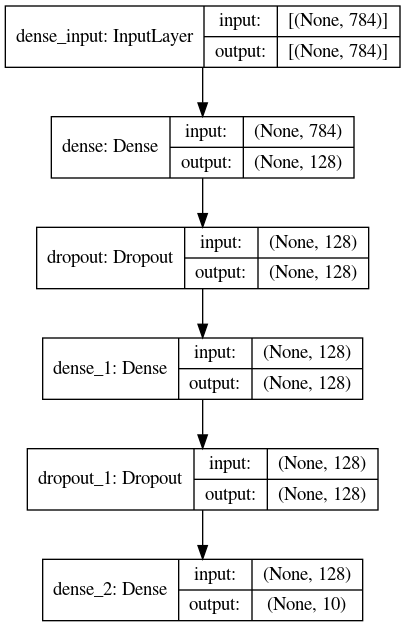

In [8]:
# print the summary of our model
model.summary()

# plot the model
keras.utils.plot_model(model,
                       to_file='mnist_tfk_seq_api.png',
                       show_shapes=True,
                       show_layer_names=True)
display.display(display.Image('mnist_tfk_seq_api.png'))


## Visualize Training with History Object

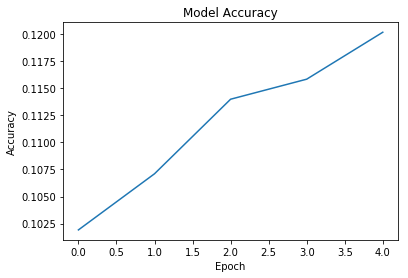

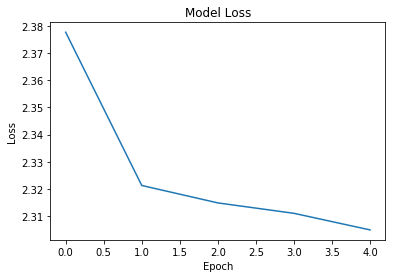

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Visualizing with TensorBoard

In [10]:
# Install Jupyter Tensorboard plugin using the following commands:

#!pip install -U tb-nightly
!pip install -U jupyter-tensorboard
!jupyter tensorboard enable --user

Requirement already up-to-date: jupyter-tensorboard in /opt/anaconda3/envs/tf2/lib/python3.6/site-packages (0.1.10)
Enabling tree extension jupyter_tensorboard/tree...
      - Validating: OK
Enabling: jupyter_tensorboard
- Writing config: /home/armando/.jupyter
    - Validating...
      jupyter_tensorboard 0.1.10 OK


In [11]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
import os

logs_dir = 'tflogs'
os.makedirs(logs_dir, exist_ok=True)

In [12]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5

# build a sequential model
model = keras.Sequential([
    Dense(units=n_neurons[0], activation='sigmoid',
          input_shape=(n_inputs,)),
    Dropout(dropout_val),
    Dense(units=n_neurons[1], activation='sigmoid'),
    Dropout(dropout_val),
    Dense(units=n_outputs, activation='softmax')
], name='MNIST Keras Sequential API')

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

log_dir = os.path.join(logs_dir,
                        datetime.now().strftime("%Y%m%d-%H%M%S"))
tbc = TensorBoard(log_dir=log_dir,
                  histogram_freq=1,
                   write_graph=True,  
                  write_images=True
                 )

history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs, callbacks=[tbc])
scores = model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 1s 24us/sample - loss: 2.3685 - accuracy: 0.1000
Epoch 2/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3178 - accuracy: 0.1090
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3108 - accuracy: 0.1154
Epoch 4/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3078 - accuracy: 0.1178
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 2.2732 - accuracy: 0.1350


In [13]:
!tensorboard --inspect --logdir {log_dir}

Processing event files... (this can take a few minutes)

Found event files in:
tflogs/20190512-224844/train
tflogs/20190512-224844/validation

These tags are in tflogs/20190512-224844/train:
audio -
histograms
   dense_3/bias_0
   dense_3/kernel_0
   dense_4/bias_0
   dense_4/kernel_0
   dense_5/bias_0
   dense_5/kernel_0
images
   dense_3/bias_0/image/0
   dense_3/kernel_0/image/0
   dense_4/bias_0/image/0
   dense_4/kernel_0/image/0
   dense_5/bias_0/image/0
   dense_5/kernel_0/image/0
scalars
   epoch_accuracy
   epoch_loss
tensor
   batch_2
   keras

Event statistics for tflogs/20190512-224844/train:
audio -
graph
   first_step           0
   last_step            0
   max_step             0
   min_step             0
   num_steps            1
   outoforder_steps     []
histograms
   first_step           0
   last_step            4
   max_step             4
   min_step             0
   num_steps            5
   outoforder_steps     []
images
   first_step           0
   last_step    

In [20]:
# load TensorBoard notebook extension
%load_ext tensorboard.notebook
%tensorboard --logdir tflogs/

The tensorboard.notebook extension is already loaded. To reload it, use:
  %reload_ext tensorboard.notebook


In [15]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5  # change this to 50000

# build a sequential model
model = keras.Sequential([
    Dense(units=n_neurons[0], activation='sigmoid',
          input_shape=(n_inputs,)),
    Dropout(dropout_val),
    Dense(units=n_neurons[1], activation='sigmoid'),
    Dropout(dropout_val),
    Dense(units=n_outputs, activation='softmax')
], name='MNIST Keras Sequential API')

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

log_dir = os.path.join(logs_dir,
                        datetime.now().strftime("%Y%m%d-%H%M%S"))
tbc = TensorBoard(log_dir=log_dir,
                  histogram_freq=1,
                   write_graph=True,  
                  write_images=True
                 )

history = model.fit(x_train, y_train, batch_size=batch_size, 
                    epochs=n_epochs, callbacks=[tbc], verbose=0)
scores = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 2.2659 - accuracy: 0.1917


## TF Keras Functional API 

In [16]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5

# define input layer
input_layer = keras.Input(shape=(n_inputs,))  

# define hidden layers and output
x = Dense(units=n_neurons[0], activation='sigmoid')(input_layer)
x = Dropout(dropout_val)(x)
x = Dense(units=n_neurons[1], activation='sigmoid')(x)
x = Dropout(dropout_val)(x)
output_layer = Dense(units=n_outputs, activation='softmax')(x)

# build a functional model
model = keras.Model(inputs=input_layer, outputs=output_layer,
                    name='MNIST Keras Functional API')

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs)

# evaluate the model and print the accuracy score
scores = model.evaluate(x_test, y_test)

print('\nloss:', scores[0])
print('accuracy:', scores[1])

Epoch 1/5
60000/60000 [==============================] - 1s 25us/sample - loss: 2.3797 - accuracy: 0.0991
Epoch 2/5
60000/60000 [==============================] - 1s 25us/sample - loss: 2.3241 - accuracy: 0.1063
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3195 - accuracy: 0.1090
Epoch 4/5
60000/60000 [==============================] - 1s 25us/sample - loss: 2.3145 - accuracy: 0.1128
Epoch 5/5
10000/10000 [==============================] - 1s 51us/sample - loss: 2.2775 - accuracy: 0.1436

 loss: 2.2775249324798583

 accuracy: 0.1436


Model: "MNIST Keras Functional API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________

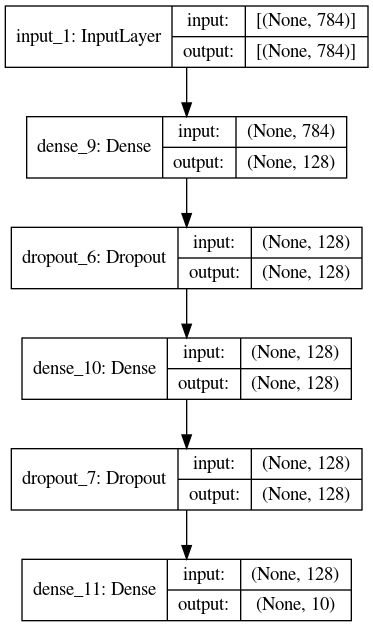

In [17]:
# print the summary of our model
model.summary()

# plot the model
keras.utils.plot_model(model, 
                       to_file='mnist_tfk_func_api.png', 
                       show_shapes=True, 
                       show_layer_names=True)
display.display(display.Image('mnist_tfk_func_api.png'))

## TF Keras Model Subclass API 

In [18]:
from tensorflow.keras.layers import Dense, Dropout

# define hyperparameters
n_neurons = [128, 128]
dropout_val = 0.1
batch_size = 100
n_epochs = 5


class TheModel(keras.Model):
    def __init__(self, n_inputs, n_outputs):
        super(TheModel, self).__init__(name='the_model')
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs

        # Define the layers
        self.l_in = Dense(units=n_neurons[0],
                          activation='sigmoid',
                          input_shape=(n_inputs, ))
        self.l_1 = Dropout(dropout_val)
        self.l_2 = Dense(units=n_neurons[1], activation='sigmoid')
        self.l_3 = Dropout(dropout_val)
        self.l_out = Dense(units=n_outputs, activation='softmax')

    def call(self, inputs):
        # Define the forward pass with the self.l_ layers
        x = self.l_in(inputs)
        x = self.l_1(x)
        x = self.l_2(x)
        x = self.l_3(x)
        return self.l_out(x)
    
    def compute_output_shape(self, input_shape):
        shape = tf.TensorShape(input_shape).as_list()
        shape[-1] = self.n_outputs
        return tf.TensorShape(shape)


model = TheModel(n_inputs=n_inputs, n_outputs=n_outputs)
model.build(input_shape=(batch_size,n_inputs))

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epochs)

# evaluate the model and print the accuracy score
scores = model.evaluate(x_test, y_test)

print('\n loss:', scores[0])
print('\n accuracy:', scores[1])

Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 2.3624 - accuracy: 0.1015
Epoch 2/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3242 - accuracy: 0.1072
Epoch 3/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3169 - accuracy: 0.1109
Epoch 4/5
60000/60000 [==============================] - 1s 22us/sample - loss: 2.3132 - accuracy: 0.1143
Epoch 5/5
10000/10000 [==============================] - 0s 45us/sample - loss: 2.2782 - accuracy: 0.1330

 loss: 2.2782363204956053

 accuracy: 0.133


Model: "the_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  100480    
_________________________________________________________________
dropout_8 (Dropout)          multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  16512     
_________________________________________________________________
dropout_9 (Dropout)          multiple                  0         
_________________________________________________________________
dense_14 (Dense)             multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


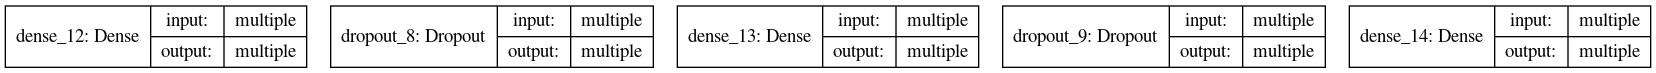

In [19]:
# print the summary of our model
model.summary()

# plot the model
keras.utils.plot_model(model, 
                       to_file='mnist_tfk_subclass.png', 
                       show_shapes=True, 
                       show_layer_names=True)
display.display(display.Image('mnist_tfk_subclass.png'))